# Laboratory #04 : Template Matching and HOG

At the end of this laboratory, you would get familiarized with

*   Normalized Correlation
*   Histogram of Oriented Gaussian

**Remember this is a graded exercise.**

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Create reusable functions where ever possible, so that the code could be reused at different places.
*   Mount your drive to access the images.
*   Add sufficient comments and explanations wherever necessary.

---

# **Students** (First Name and Last Name)

1.  Eva Veli
2.  Tatevik Davtyan

---

In [ ]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt
import os
from skimage.color import rgb2gray, rgba2rgb
from skimage import io, data
from skimage.feature import match_template,hog
from skimage.morphology import binary_dilation, disk
from skimage.exposure import equalize_hist
from skimage.transform import rotate
from skimage.feature import hog
import matplotlib.patches as patches

In [ ]:
img_fld = r''

# Template Matching

## Exercise #1: Normalized correlation

*   Load 'einstein.png' image and use 'template.png' to find the location of the template using normalized cross-correlation. *Hint:match_template function is available in the skimage.feature module.*
*   Visualize the original image, template image and normalized cross-correlation image using matplotlib.

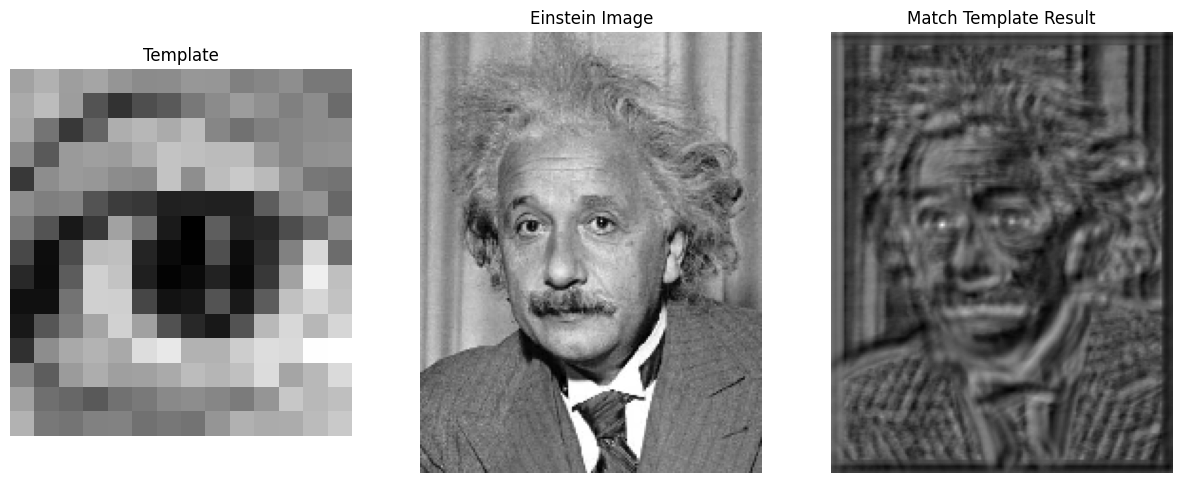

In [ ]:
einstein_image = io.imread('einstein.png')
einstein_image_gray = rgb2gray(einstein_image[:,:,:3])
template_image = io.imread('template.png', as_gray=True)

crossCorrelation_image = match_template(einstein_image_gray,template_image,pad_input=True)

fig = plt.figure(figsize=(15, 15))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3)

# Display template image
ax1.imshow(template_image, cmap=plt.cm.gray)
ax1.set_axis_off()
ax1.set_title('Template')

# Display Einstein image with rectangle around the match
ax2.imshow(einstein_image_gray, cmap='gray')
ax2.set_axis_off()
ax2.set_title('Einstein Image')


# Display result of the match template
ax3.imshow(crossCorrelation_image, cmap='gray')
ax3.set_axis_off()
ax3.set_title('Match Template Result')


plt.show()

*   What is the output of the normalized cross-correlation function?

**Solution**
The normalized cross-correlation returns an array, where the parts of the orginal image that are similiar to the template image are shown more cleraly, for example in our case the eyes are emphasized particulary. If you print the array of cross correlation image the value at a given position corresponds to the correlation coefficient between the original image and the template we have passed as a parameter.




The output of match_template function gives the response image with correlation coefficients. Let us visualize the exact location of the match:
*   Create a function to take the normalized cross-correlation image as input and return a bw image
    *   The function should convert the normalized cross-correlation image to a thresholded image.

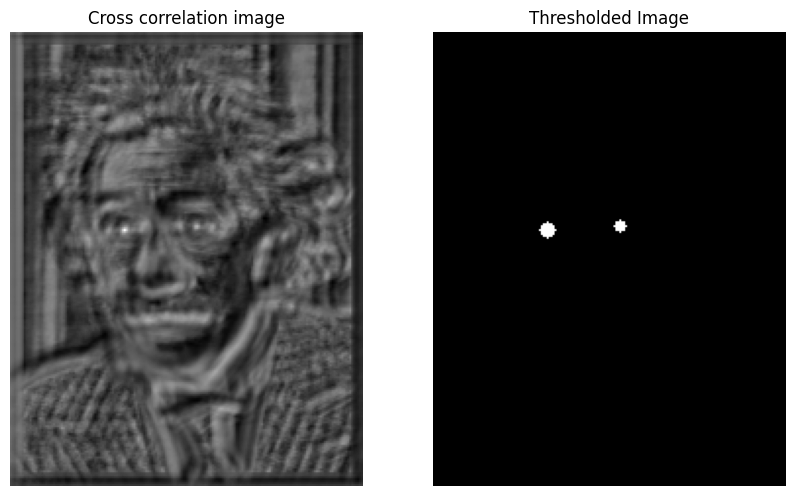

In [ ]:
# solution
def crossCorrelation_to_Binary(crossCorrelation_image, threshold):
  binary_image = crossCorrelation_image.copy()
  mask = crossCorrelation_image > threshold
  binary_image[mask] = 1
  binary_image[np.invert(mask)] = 0
  return binary_image

binary_image = crossCorrelation_to_Binary(crossCorrelation_image,0.55)
binary_image = binary_dilation(binary_image,disk(3))

fig = plt.figure(figsize=(10,10))
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)


# Display template image
ax1.imshow(crossCorrelation_image, cmap='gray')
ax1.set_axis_off()
ax1.set_title('Cross correlation image')

# Display Einstein image with rectangle around the match
ax2.imshow(binary_image, cmap='gray')
ax2.set_axis_off()
ax2.set_title('Thresholded Image')


plt.show()

*   Visualize the thresholded image on top of the original image. Show the exact location of the match in red color.
*   *Hint: learn about alpha channels and listed colormaps in matplotlib*

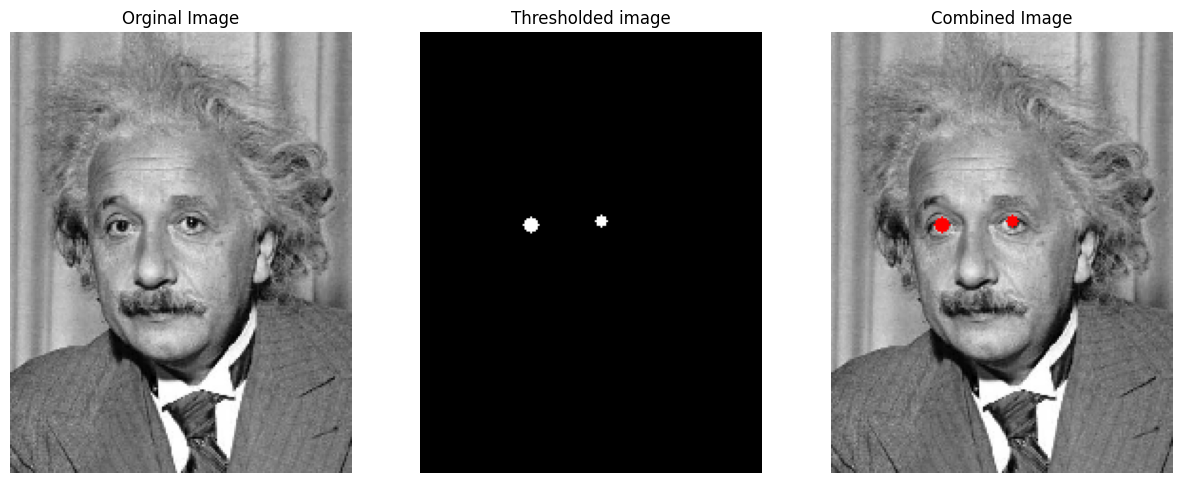

In [ ]:
# solution
def combine_images(image,binary_image):
  binary_image_bool = binary_image != 0
  image_color = image.copy()
  image_color[:,:,0][binary_image_bool] = 255
  image_color[:,:,1][binary_image_bool] = 0
  image_color[:,:,2][binary_image_bool] = 0
  return image_color

einstein_color = combine_images(einstein_image,binary_image)

fig = plt.figure(figsize=(15, 15))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3)

# Display template image
ax1.imshow(einstein_image, cmap='gray')
ax1.set_axis_off()
ax1.set_title('Orginal Image')

# Display Einstein image with rectangle around the match
ax2.imshow(binary_image, cmap='gray')
ax2.set_axis_off()
ax2.set_title('Thresholded image')


# Display result of the match template
ax3.imshow(einstein_color, cmap='gray')
ax3.set_axis_off()
ax3.set_title('Combined Image')


plt.show()


## Exercise #2: Effect of contrast

*   Load 'einstein_br.png'
*   Perform template matching with the 'template.png' image
*   Visualize the original image, template image, normalized cross-correlation image and the thresholded image using matplotlib.

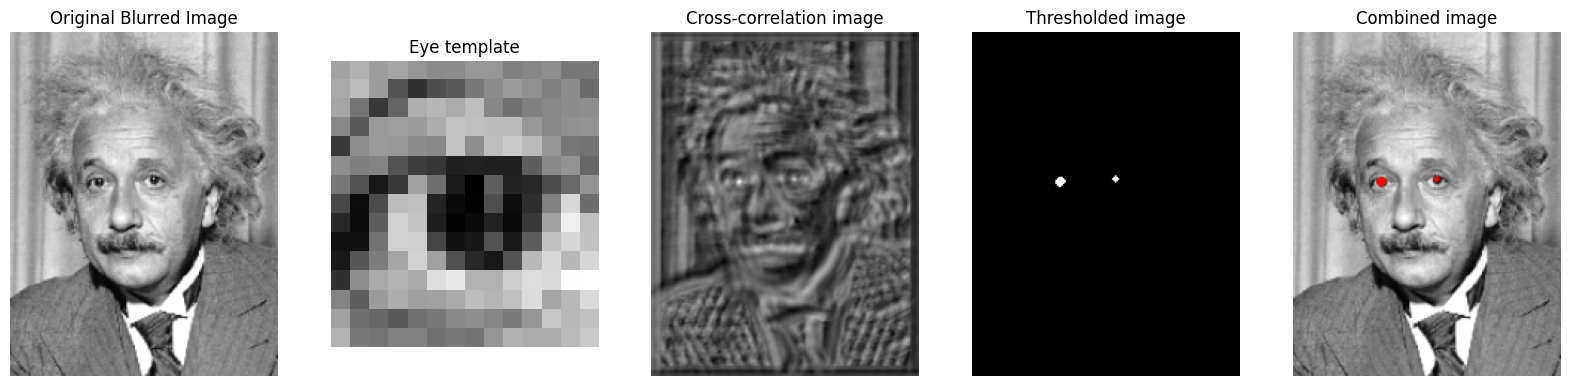

In [ ]:
# solution
einstein_br_image = io.imread('einstein_br.png')
einstein_br_image_gray = rgb2gray(einstein_br_image[:,:,:3])
template_image_gray = io.imread('template.png', as_gray=True)

crossCorrelation_br_image = match_template(einstein_br_image_gray,template_image_gray,pad_input=True)

binary_br_image = crossCorrelation_to_Binary(crossCorrelation_br_image,0.55)
binary_br_image = binary_dilation(binary_br_image,disk(2))

einstein_br_image_color = combine_images(einstein_br_image,binary_br_image)

fig, axes = plt.subplots(1, 5, figsize=(20, 15))
axes[0].imshow(einstein_br_image_gray, cmap='gray')
axes[0].set_title('Original Blurred Image')
axes[0].axis('off')

axes[1].imshow(template_image_gray, cmap='gray')
axes[1].set_title('Eye template')
axes[1].axis('off')

axes[2].imshow(crossCorrelation_br_image, cmap='gray')
axes[2].set_title('Cross-correlation image')
axes[2].axis('off')

axes[3].imshow(binary_br_image, cmap='gray')
axes[3].set_title('Thresholded image')
axes[3].axis('off')


axes[4].imshow(einstein_br_image_color, cmap='gray')
axes[4].set_title('Combined image')
axes[4].axis('off')

plt.show()



*   Repeat the above experiment with 'einstein_mask.png' image and visualize the results.

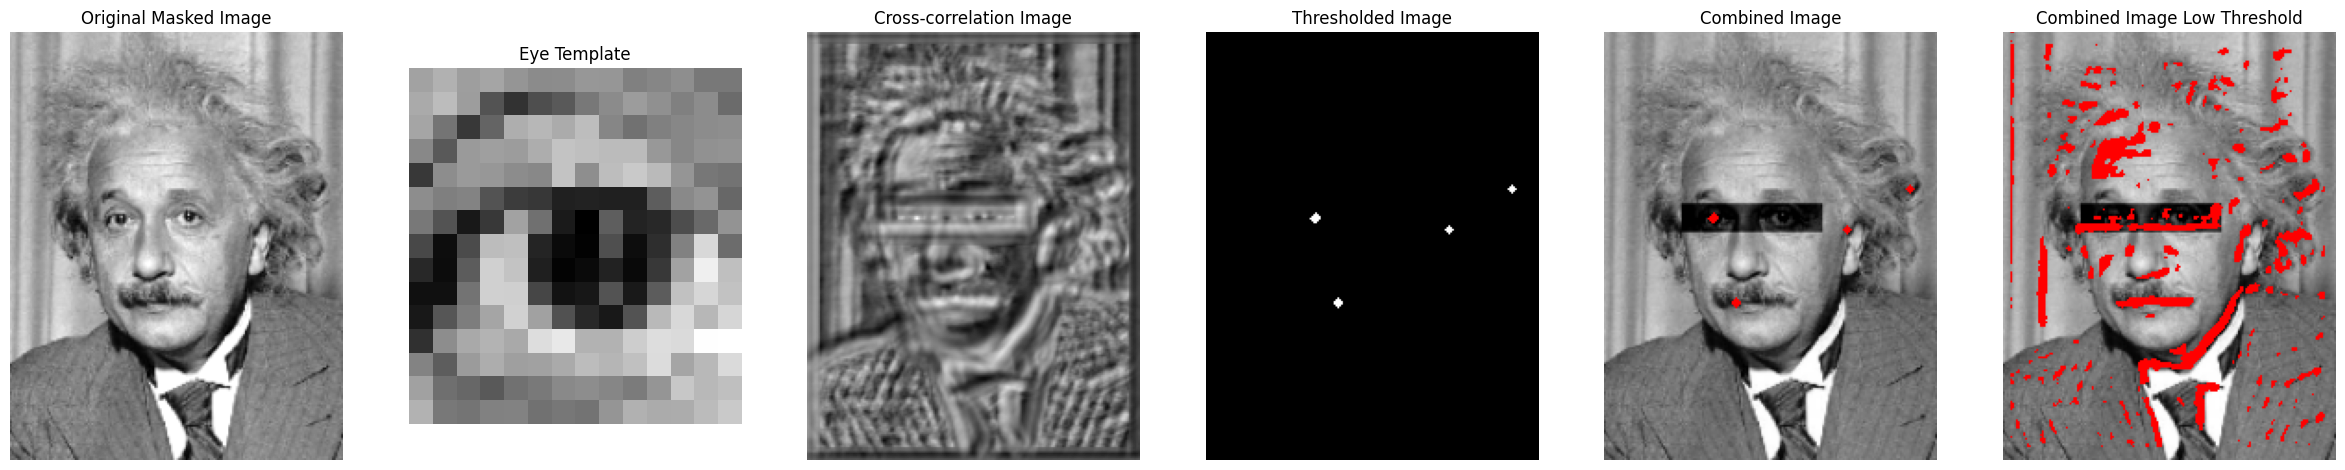

In [ ]:
# solution
einstein_mask_image = io.imread('einstein_mask.png')
einstein_mask_image_gray = rgb2gray(einstein_mask_image[:,:,:3])
template_image = io.imread('template.png',as_gray=True)

crossCorrelation_mask_image = match_template(einstein_mask_image_gray,template_image,pad_input=True)
binary_mask_image = crossCorrelation_to_Binary(crossCorrelation_mask_image,0.50)
binary_mask_image_low_threshold = crossCorrelation_to_Binary(crossCorrelation_mask_image,0.2)
binary_mask_image = binary_dilation(binary_mask_image,disk(2))

einstein_mask_image_color = combine_images(einstein_mask_image,binary_mask_image)
einstein_mask_image_color_low_threshold = combine_images(einstein_mask_image,binary_mask_image_low_threshold)


fig, axes = plt.subplots(1, 6, figsize=(30, 25))
axes[0].imshow(einstein_br_image_gray, cmap='gray')
axes[0].set_title('Original Masked Image')
axes[0].axis('off')

axes[1].imshow(template_image, cmap='gray')
axes[1].set_title('Eye Template')
axes[1].axis('off')

axes[2].imshow(crossCorrelation_mask_image, cmap='gray')
axes[2].set_title('Cross-correlation Image')
axes[2].axis('off')

axes[3].imshow(binary_mask_image, cmap='gray')
axes[3].set_title('Thresholded Image')
axes[3].axis('off')


axes[4].imshow(einstein_mask_image_color, cmap='gray')
axes[4].set_title('Combined Image')
axes[4].axis('off')

axes[5].imshow(einstein_mask_image_color_low_threshold, cmap='gray')
axes[5].set_title('Combined Image Low Threshold')
axes[5].axis('off')

plt.show()


*   Do you find any differences in results with respect to contrast changes?
*   Explain your inferences.

**Solution**

  It cannot detect the left eye with the threshold we have used. If we lower the threshold it can detect also the left eye but than we will create a lot of false detections.


*   What happens if you change the contrast of the template image?
*   Use 'template_br.png' instead of 'template.png' and repeat the experiment with 'einstein.png'
*   Visualize the results.

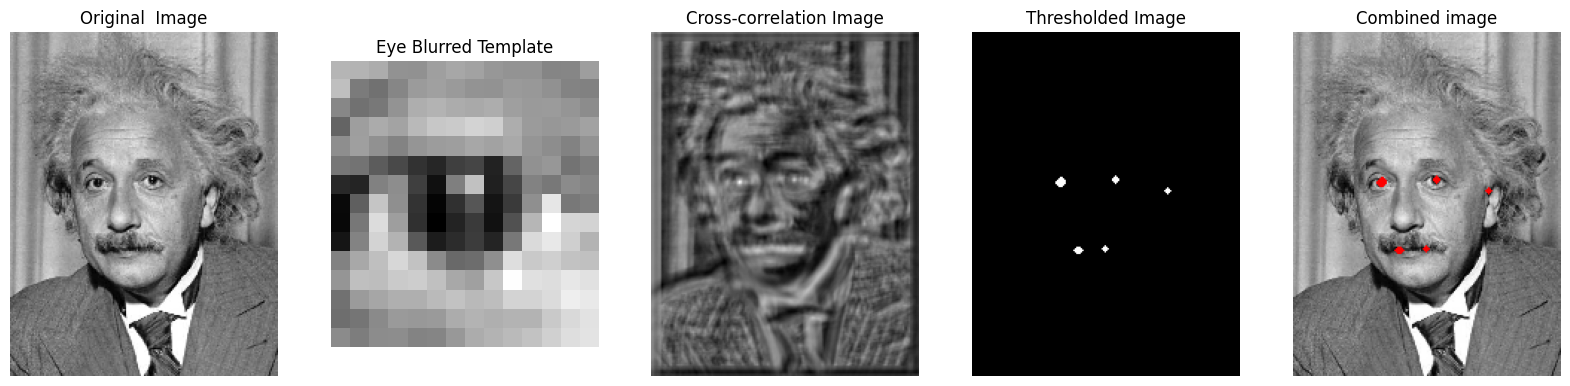

In [ ]:
# solution
einstein_image = io.imread('einstein.png')
einstein_image_gray = rgb2gray(einstein_image[:,:,:3])
template_br_image_gray = io.imread('template_br.png', as_gray=True)

crossCorrelation_image = match_template(einstein_image_gray,template_br_image_gray,pad_input=True)
binary_image_template_mask = crossCorrelation_to_Binary(crossCorrelation_image,0.53)
binary_image_template_mask = binary_dilation(binary_image_template_mask,disk(2))
einstein_image_template_mask_color = combine_images(einstein_image,binary_image_template_mask)

fig, axes = plt.subplots(1, 5, figsize=(20, 15))
axes[0].imshow(einstein_image_gray, cmap='gray')
axes[0].set_title('Original  Image')
axes[0].axis('off')

axes[1].imshow(template_br_image_gray, cmap='gray')
axes[1].set_title('Eye Blurred Template')
axes[1].axis('off')

axes[2].imshow(crossCorrelation_image, cmap='gray')
axes[2].set_title('Cross-correlation Image')
axes[2].axis('off')

axes[3].imshow(binary_image_template_mask, cmap='gray')
axes[3].set_title('Thresholded Image')
axes[3].axis('off')


axes[4].imshow(einstein_image_template_mask_color, cmap='gray')
axes[4].set_title('Combined image')
axes[4].axis('off')

plt.show()

**Solution**

Changing the contrast of the template image does not matter too much as long as the match_template function is somehow invariant to the ilumination. If we use tample_br, we can appreciate that it detects also the other eye but does not provide us with a good solution. We are still getting false detections.


## **Exercise #3: Effect of rotation**

*   Load 'einstein.png' image and 'template.png' image.
*   Rotate the template by 10&deg;, 20&deg;, 30&deg; and perform template matching.
*   Visualize the original image, template image and the thresholded normalized cross-correlation image for all the different templates.
*   *Hint: rotate function is available in skimage.transform module*

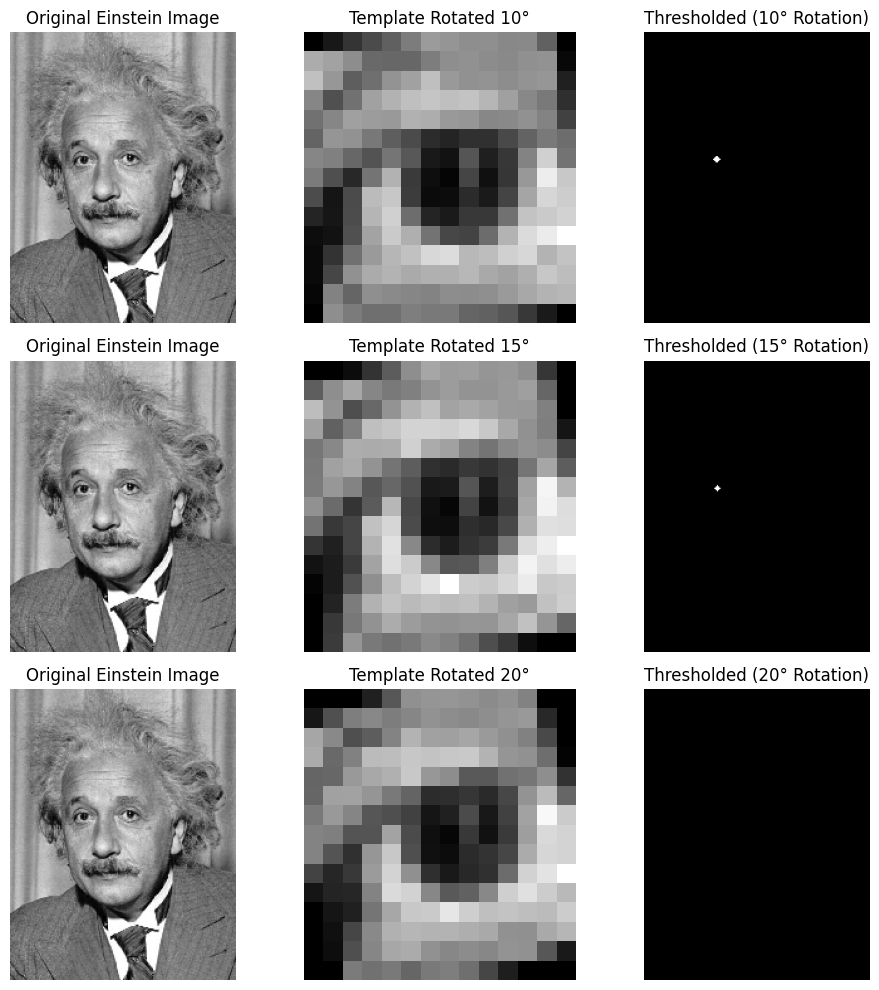

In [ ]:
# solution
einstein_image = io.imread('einstein.png')
einstein_image_gray = rgb2gray(einstein_image[:,:,:3])
template_image_gray = io.imread('template.png',as_gray=True)

template_image_r_10 = rotate(template_image_gray, 10, resize=False)
template_image_r_15 = rotate(template_image_gray, 15, resize=False)
template_image_r_20 = rotate(template_image_gray, 20, resize=False)
NCC_image_temp_r_10 = match_template(einstein_image_gray,template_image_r_10,pad_input=True)
NCC_image_temp_r_15 = match_template(einstein_image_gray,template_image_r_15,pad_input=True)
NCC_image_temp_r_20 = match_template(einstein_image_gray,template_image_r_20,pad_input=True)

binary_image_temp_r_10_gray = crossCorrelation_to_Binary(NCC_image_temp_r_10,0.55)
binary_image_temp_r_15_gray = crossCorrelation_to_Binary(NCC_image_temp_r_15,0.55)
binary_image_temp_r_20_gray = crossCorrelation_to_Binary(NCC_image_temp_r_20,0.55)

binary_image_temp_r_10_gray = binary_dilation(binary_image_temp_r_10_gray,disk(2))
binary_image_temp_r_15_gray = binary_dilation(binary_image_temp_r_15_gray,disk(2))
binary_image_temp_r_20_gray = binary_dilation(binary_image_temp_r_20_gray,disk(2))

# Adjusted plotting based on the updated request
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

# Row 1: Original images, template rotated, thresholded binary images for 10°
axes[0, 0].imshow(einstein_image_gray, cmap='gray')
axes[0, 0].set_title('Original Einstein Image')
axes[0, 0].axis('off')

axes[0, 1].imshow(template_image_r_10, cmap='gray')
axes[0, 1].set_title('Template Rotated 10°')
axes[0, 1].axis('off')

axes[0, 2].imshow(binary_image_temp_r_10_gray, cmap='gray')
axes[0, 2].set_title('Thresholded (10° Rotation)')
axes[0, 2].axis('off')

# Row 2: Original images, template rotated, thresholded binary images for 15°
axes[1, 0].imshow(einstein_image_gray, cmap='gray')
axes[1, 0].set_title('Original Einstein Image')
axes[1, 0].axis('off')

axes[1, 1].imshow(template_image_r_15, cmap='gray')
axes[1, 1].set_title('Template Rotated 15°')
axes[1, 1].axis('off')

axes[1, 2].imshow(binary_image_temp_r_15_gray, cmap='gray')
axes[1, 2].set_title('Thresholded (15° Rotation)')
axes[1, 2].axis('off')

# Row 3: Original images, template rotated, thresholded binary images for 20°
axes[2, 0].imshow(einstein_image_gray, cmap='gray')
axes[2, 0].set_title('Original Einstein Image')
axes[2, 0].axis('off')

axes[2, 1].imshow(template_image_r_20, cmap='gray')
axes[2, 1].set_title('Template Rotated 20°')
axes[2, 1].axis('off')

axes[2, 2].imshow(binary_image_temp_r_20_gray, cmap='gray')
axes[2, 2].set_title('Thresholded (20° Rotation)')
axes[2, 2].axis('off')

plt.tight_layout()
plt.show()


*   What do you infer with respect to rotation?

**Solution**
Template matching is sensitive to rotation; small rotations (like 10°) still allow decent matches, but accuracy drops as the rotation angle increases (15° or 20°). This shows the need for more robust methods when dealing with rotated objects.

...

# Histogram of Oriented Gaussians

## Exercise #1: HOG Image Visualization

*   Load 'astronaut' image from the data module.
*   Apply hog over the image with default parameters. *Hint: hog function is available in skimage.feature module.*
*   Visualize the original image and the hog_image using matplotlib


In [ ]:
# solution
image = data.astronaut()
_ ,image_hog = hog(rgb2gray(image),visualize = True)


(-0.5, 511.5, 511.5, -0.5)

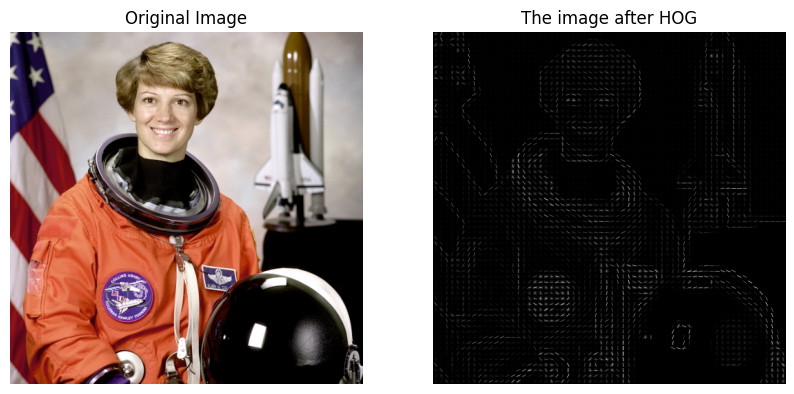

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 10))


axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(image_hog,cmap = "gray")
axes[1].set_title('The image after HOG')
axes[1].axis('off')


*   Explain the algorithm behind HOG



**Solution**
Devide the image into small regions called cells. Compute the derivatives and obtainthe direction  ( angle) of the derivatives. Arrange the angles into a histogram with certain bin. Weight the histogram by the magnitute of gradien. Apply normalization to the histogram according to the blocks. Concatenate all the obtained hisogramx.

...

*   What do you infer from the parameters
    *   orientation
    *   pixels_per_cell


**Solution**
Orientation is the number of the bins for each of the cell. When we increase it, the vector representing the histogram is elongated but contains more granular information because increasing the orientation make range of the angles is smaller..
Pixel per cell means the size of the cell for which we are calculating the hisgtogram. Usually the cells are very small, and they represent the local shape of the image.

...

*   Change the value of orientation (try atleast 3 different values) and compare the hog_image using matplotlib subplot.

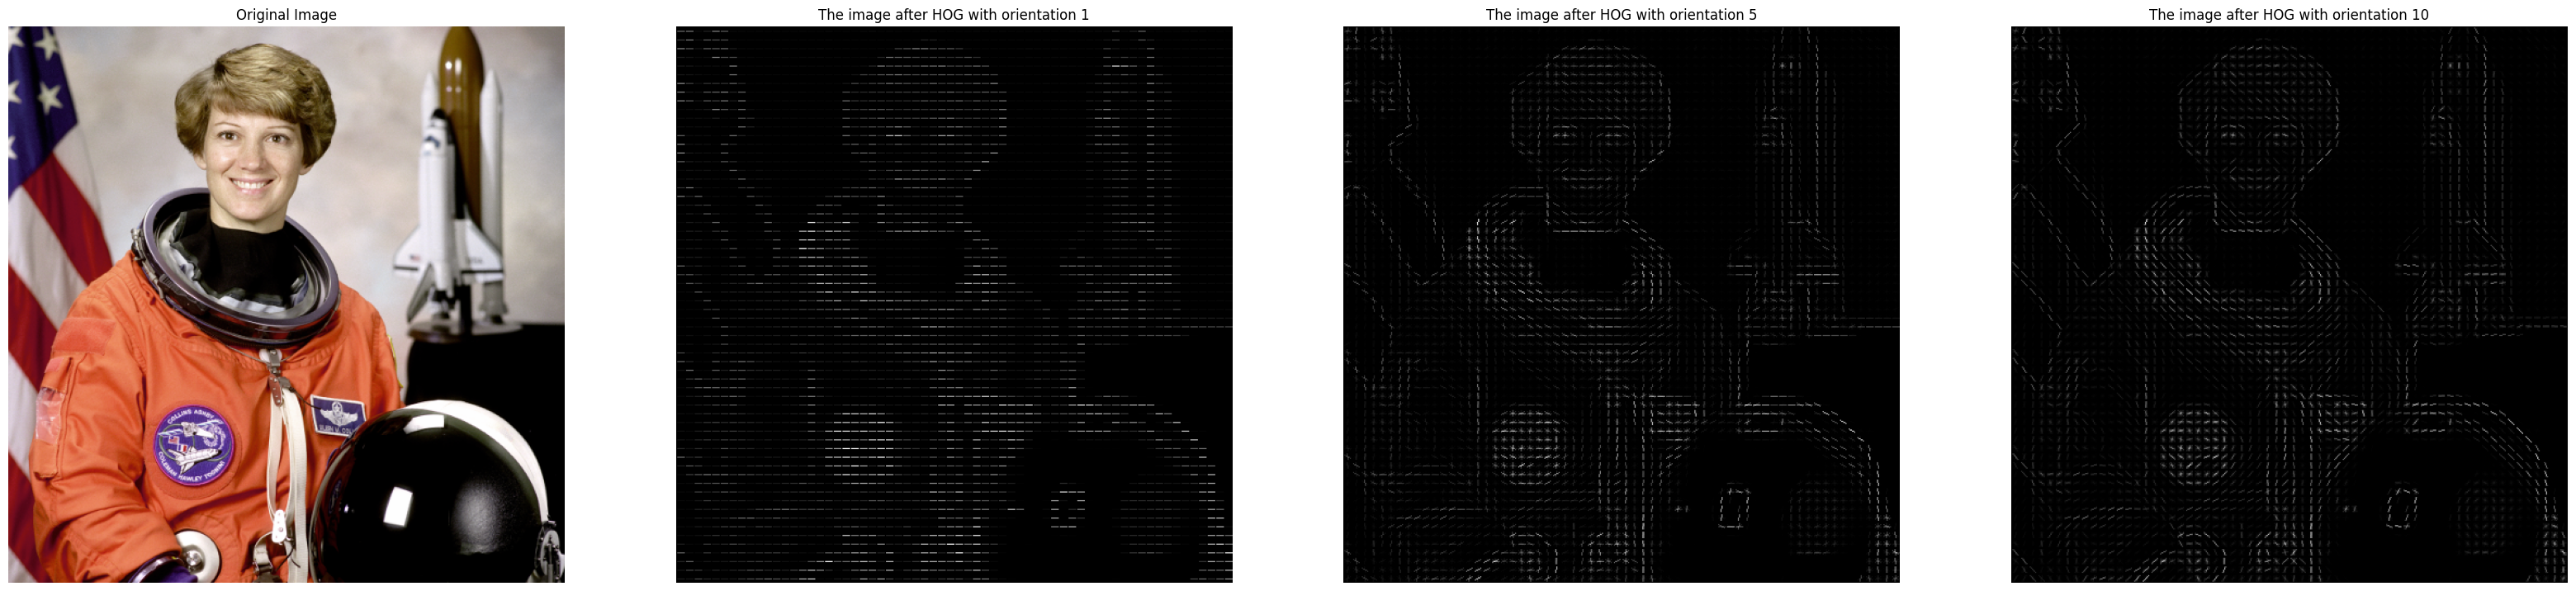

In [ ]:
# solution
fig, axes = plt.subplots(1, 4, figsize=(40, 40))

axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

_ ,image_hog_1 = hog(rgb2gray(image),orientations = 1,visualize = True)
axes[1].imshow(image_hog_1,cmap = "gray")
axes[1].set_title('The image after HOG with orientation 1')
axes[1].axis('off')


_ ,image_hog_5 = hog(rgb2gray(image),orientations = 5,visualize = True)
axes[2].imshow(image_hog_5,cmap = "gray")
axes[2].set_title('The image after HOG with orientation 5')
axes[2].axis('off')


_ ,image_hog_10 = hog(rgb2gray(image),orientations = 10,visualize = True)
axes[3].imshow(image_hog_10,cmap = "gray")
axes[3].set_title('The image after HOG with orientation 10')
axes[3].axis('off')
plt.show()


*   What is the role of block normalization in HoG?
*   What are the different methods available in block normalization fo skimage?

**Solution**

Block normalization is for better performance since it is more invariante to changes in illumination and shadowing.
Skimage has several available normalizations: L-1 normalization, L-1 squared, 2 normalization and L2-Hys which is normalization using L2-norm, followed by limiting the maximum values to 0.2 (Hys stands for hysteresis) and renormalization using L2-norm.

...

*   The hog function in skimage returns feature descriptors and hog image. Explain each dimension of the feature descriptor output

**Solution**
The returned descriptior has a dimension of 5: number of rows in block, number of columns in block, number of rows in cell, number of columns in cell, and the orientation number.


...

## Exercise #2: Pedestrian detection

*   Read the template ('person_template.png') and obtain its HOG descriptor (try different values for the parameters and get the optimal value)
*   Visualize the original image and the hog_image using matplotlib.
*   Show different parameter selection steps also using matplotlib.
*   How did you select the optimal value?

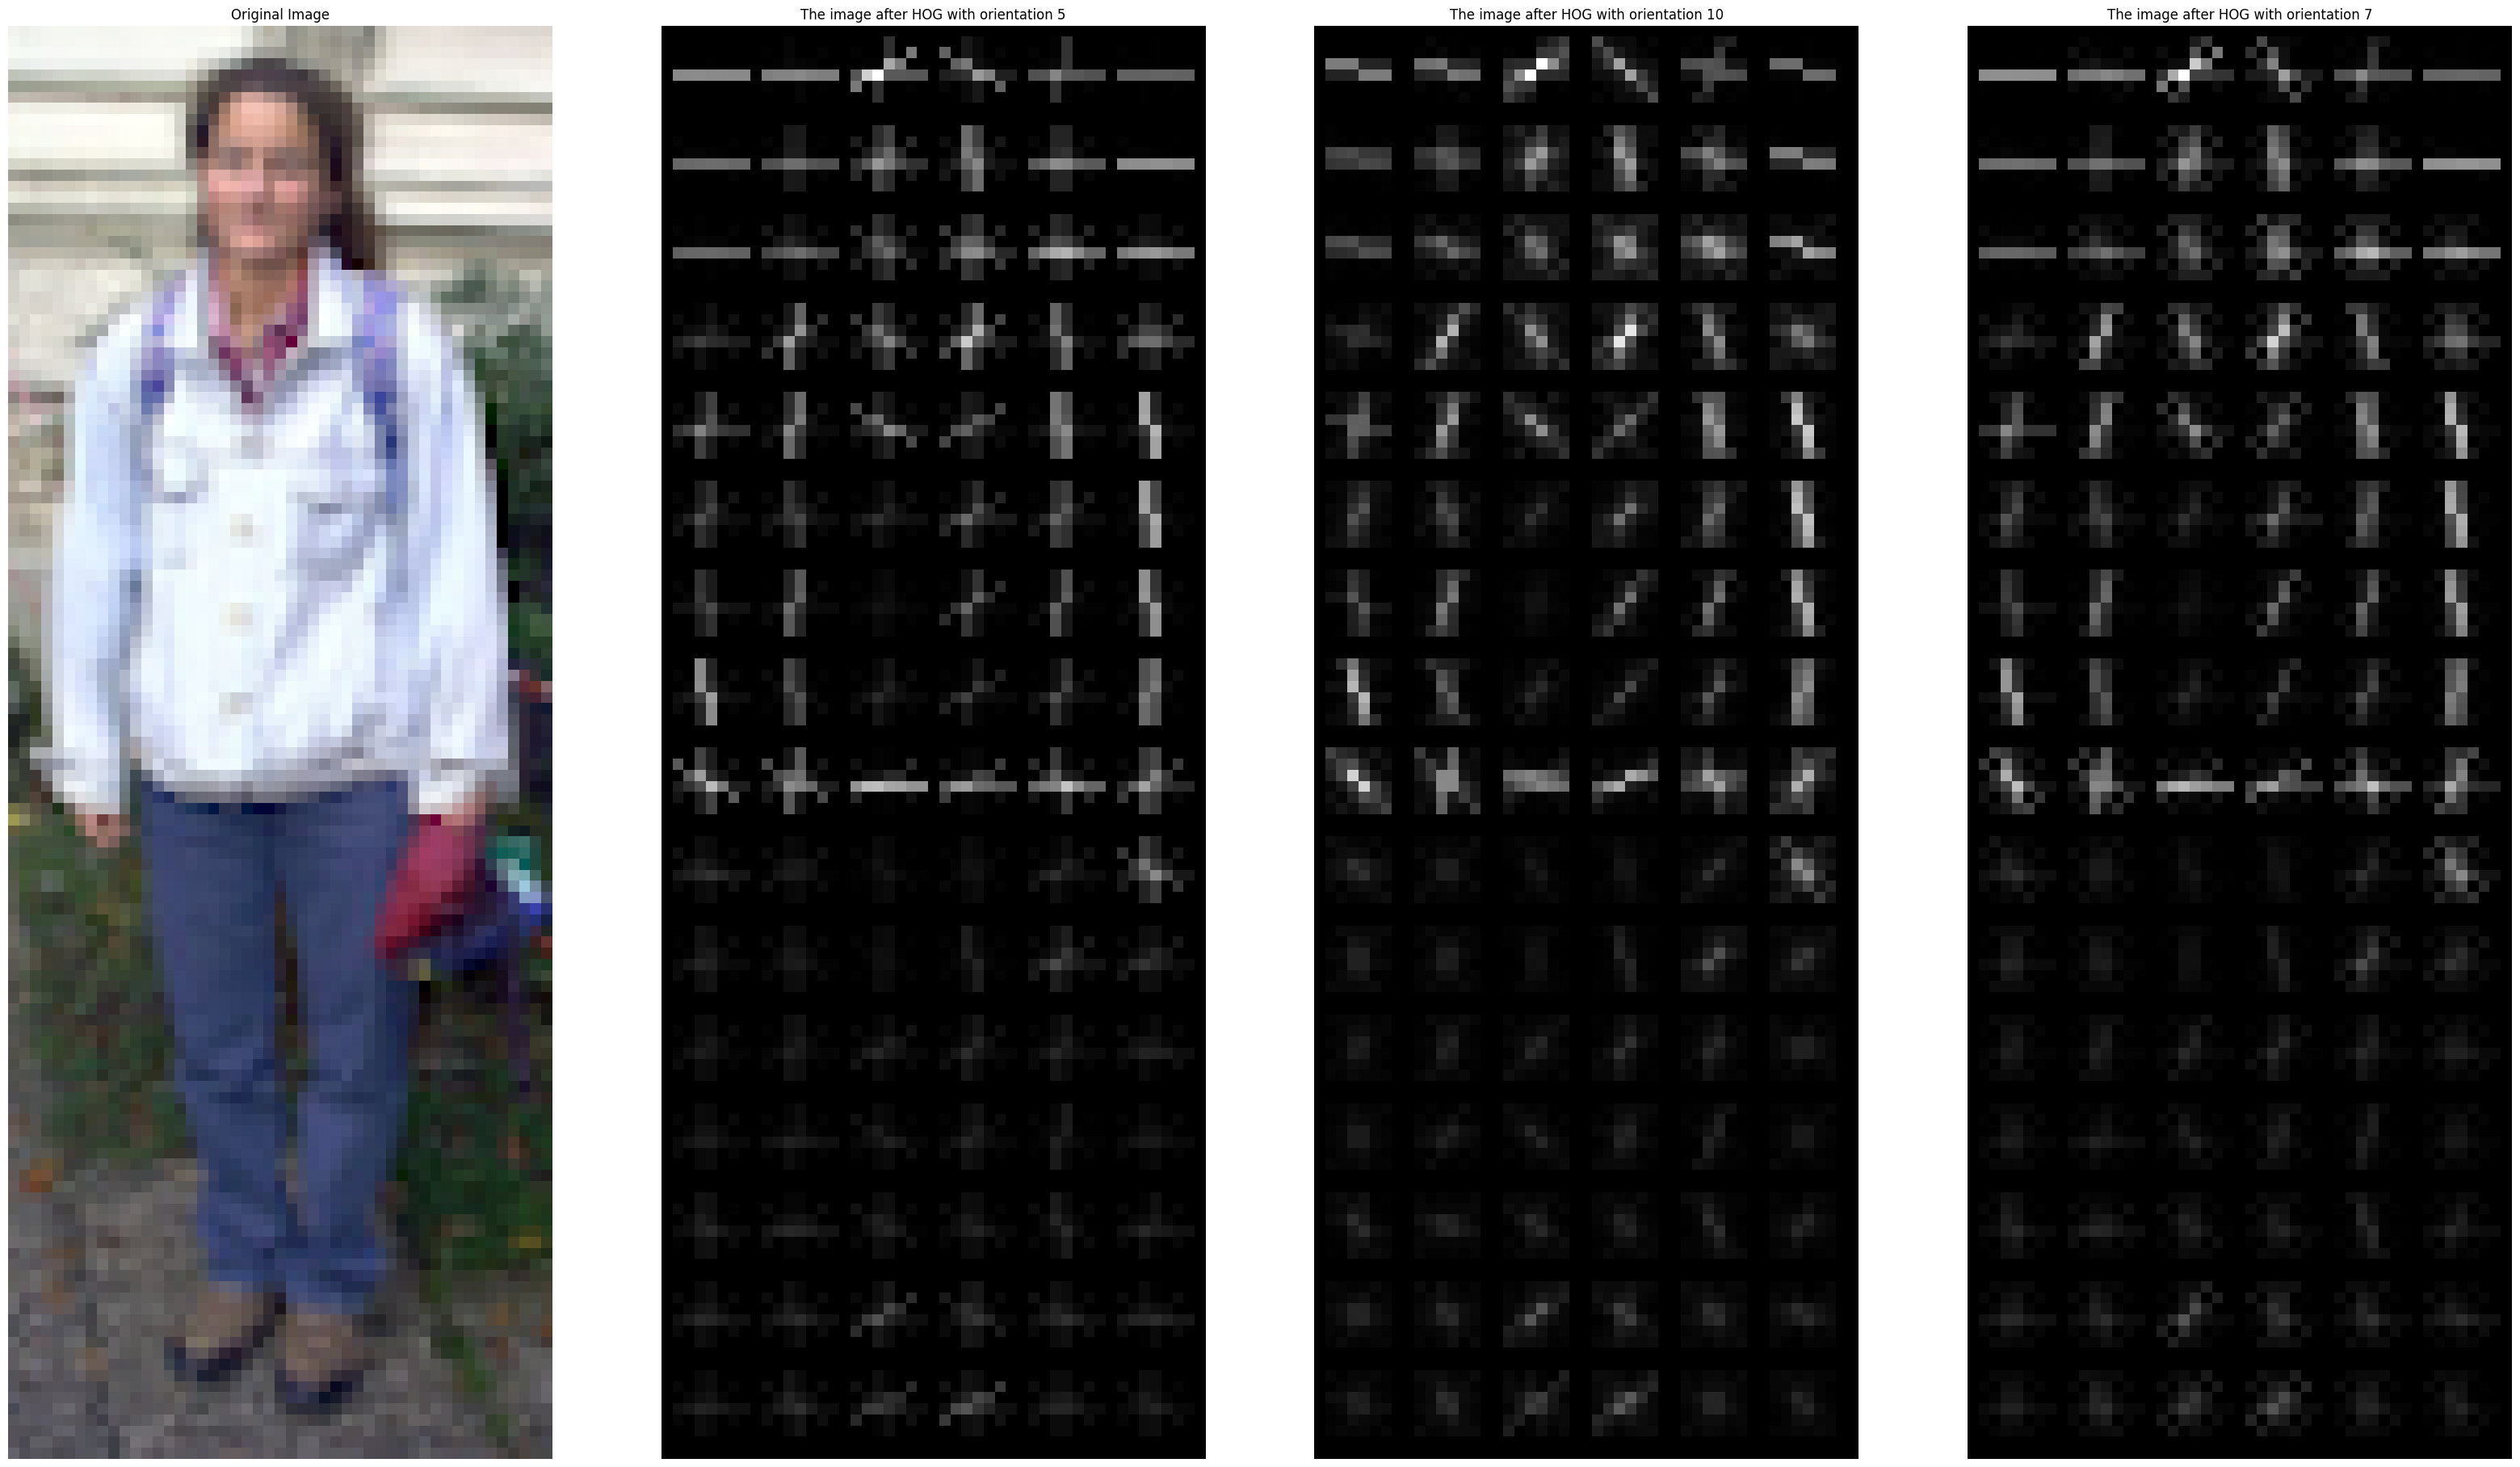

In [ ]:
# solution

#first let's decide on the orinetation
image = io.imread('person_template.bmp')
image = rgba2rgb(image)

fig, axes = plt.subplots(1, 4, figsize=(40, 40))


axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

_ ,image_hog_5 = hog(rgb2gray(image),orientations = 5,visualize = True)
axes[1].imshow(image_hog_5,cmap = "gray")
axes[1].set_title('The image after HOG with orientation 5')
axes[1].axis('off')


_ ,image_hog_10 = hog(rgb2gray(image),orientations = 10,visualize = True)
axes[2].imshow(image_hog_10,cmap = "gray")
axes[2].set_title('The image after HOG with orientation 10')
axes[2].axis('off')


_ ,image_hog_7 = hog(rgb2gray(image),orientations = 7,visualize = True)
axes[3].imshow(image_hog_7,cmap = "gray")
axes[3].set_title('The image after HOG with orientation 7')
axes[3].axis('off')
plt.show()




According to the 3 different orientations, the best orientation is 7, since it both captures the needed local information, however does not loose the needed information similar to orientation 5. In addition, it is not such fine-grained as prientation 10, which results in a good balance between obtaining the local features and avoiding the unnecessary small details.

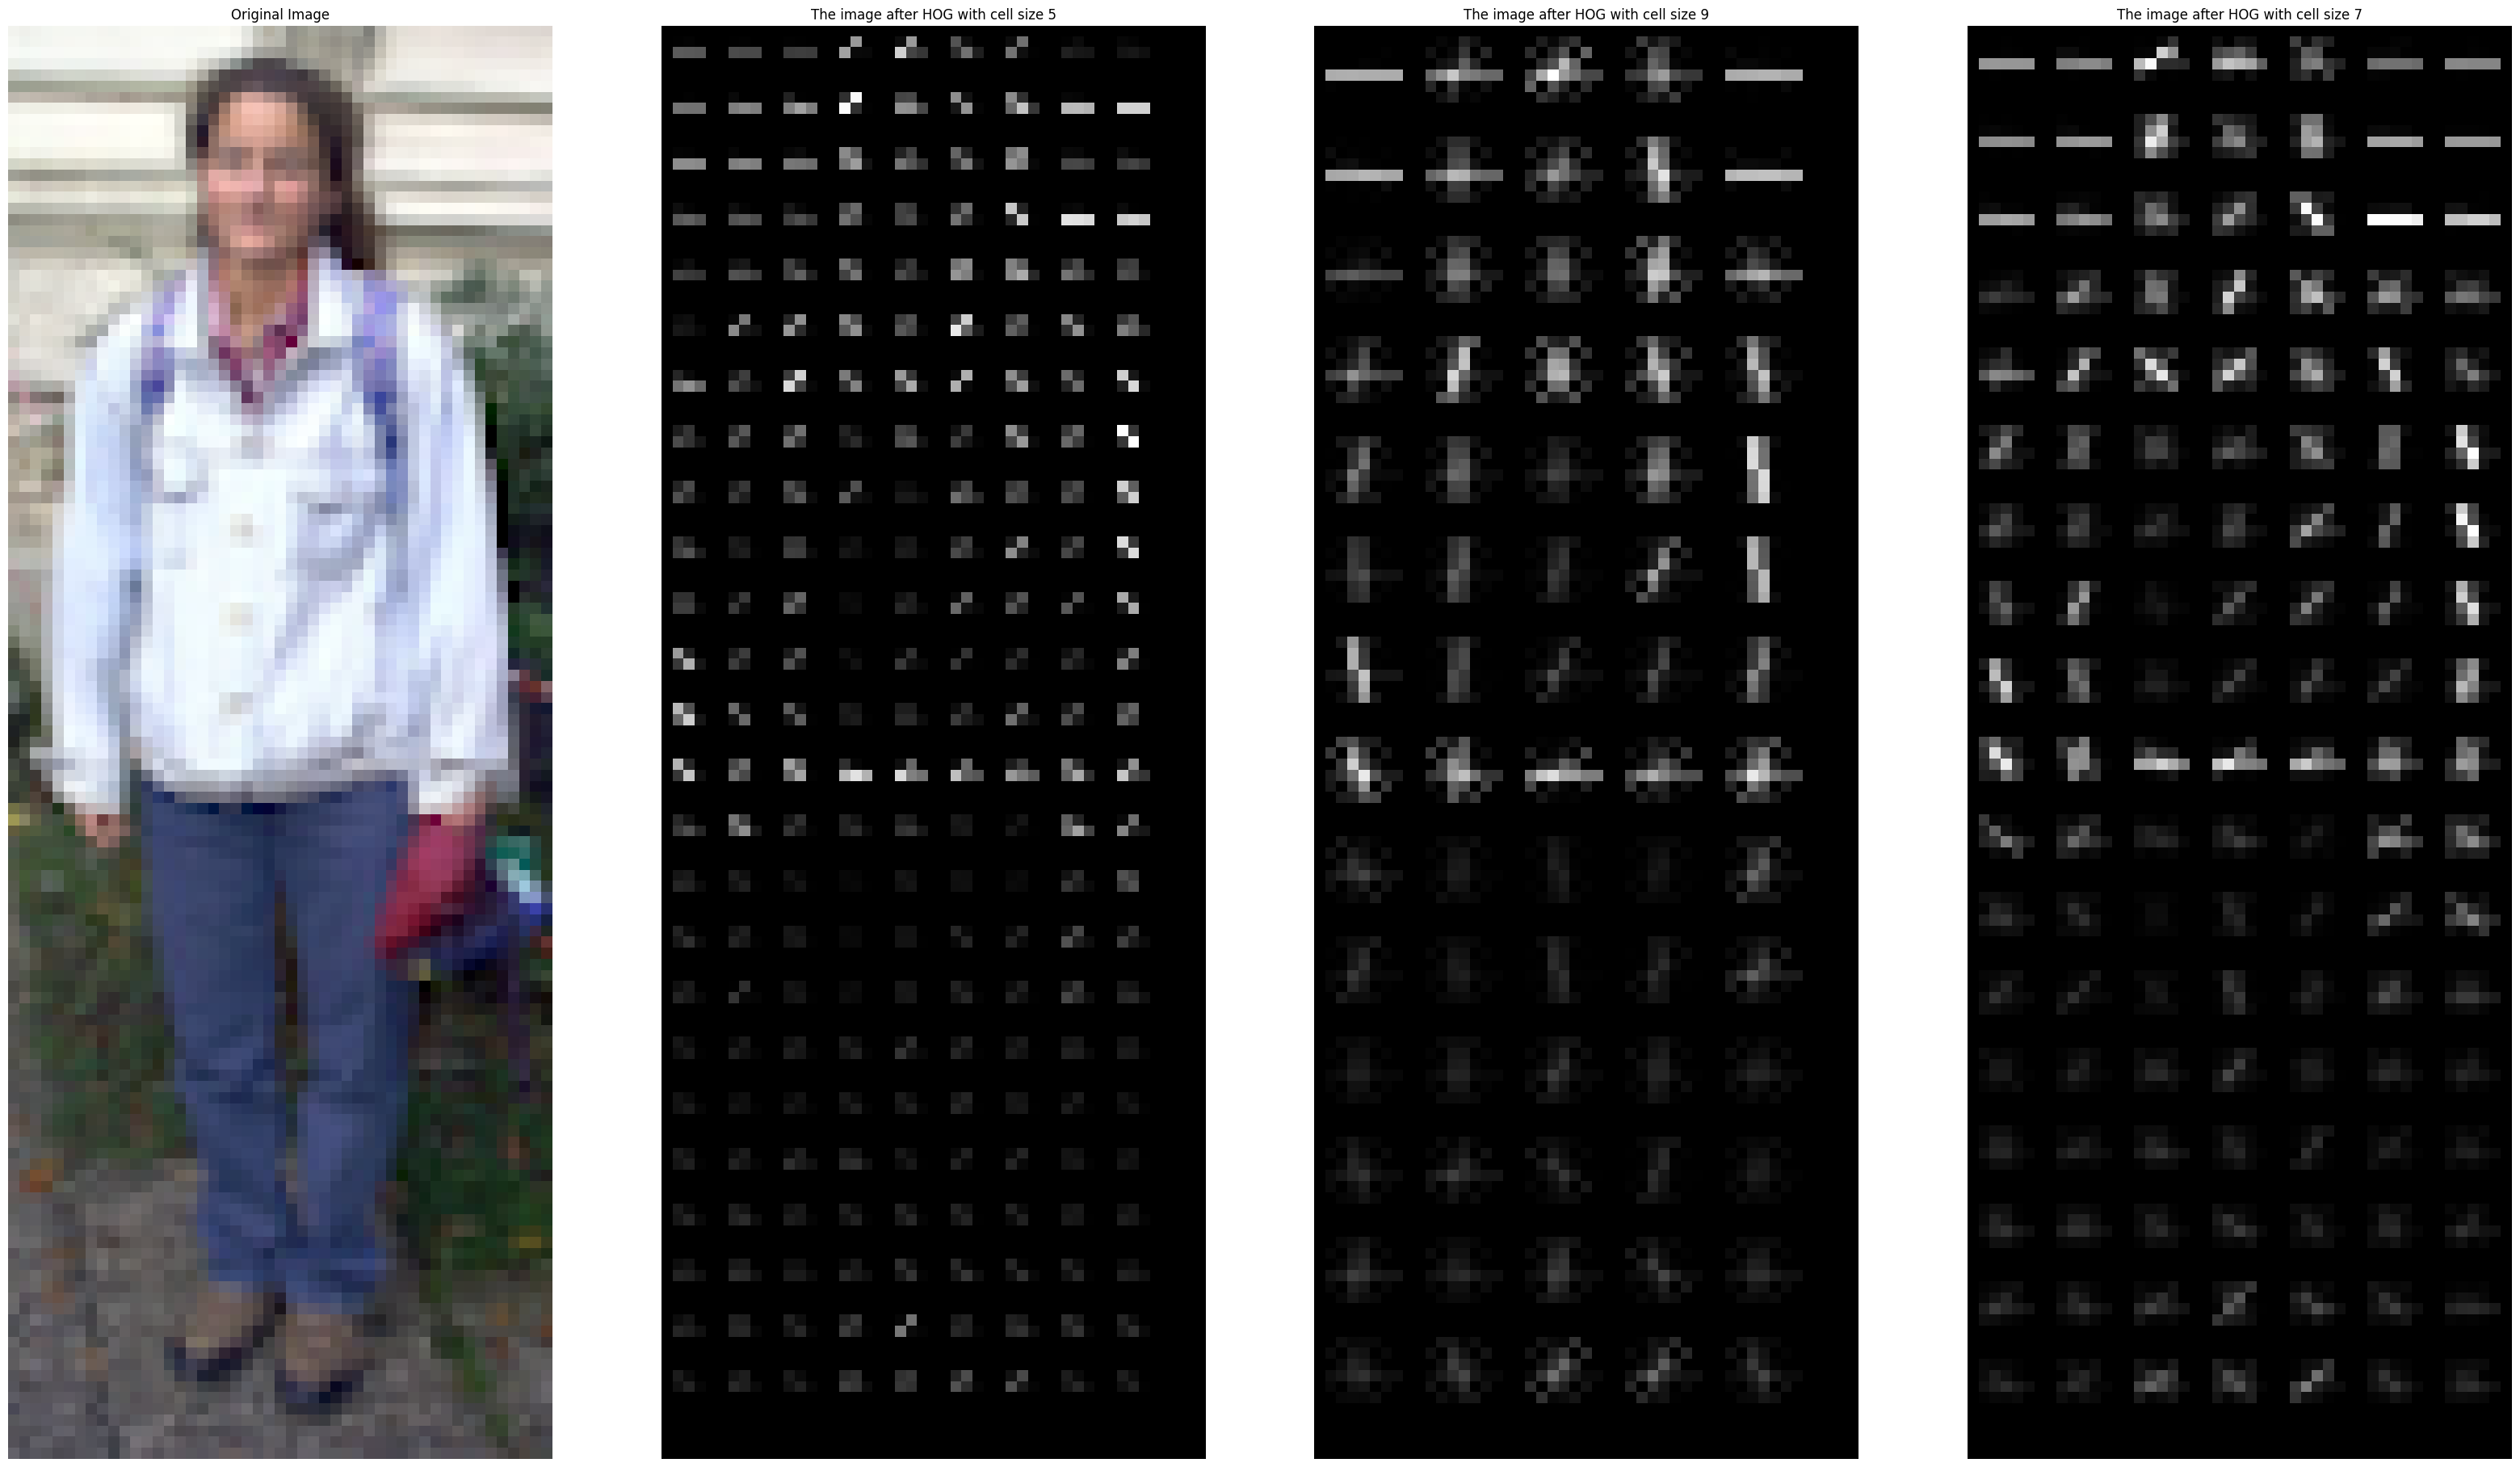

In [ ]:
# solution

#now let's decide the cell size
image = io.imread('person_template.bmp')
image = rgba2rgb(image)

fig, axes = plt.subplots(1, 4, figsize=(40, 40))


axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

_ ,image_hog_5 = hog(rgb2gray(image),orientations = 7,pixels_per_cell = (5,5),visualize = True)
axes[1].imshow(image_hog_5,cmap = "gray")
axes[1].set_title('The image after HOG with cell size 5')
axes[1].axis('off')


_ ,image_hog_9 = hog(rgb2gray(image),orientations = 7,pixels_per_cell = (9,9),visualize = True)
axes[2].imshow(image_hog_9,cmap = "gray")
axes[2].set_title('The image after HOG with cell size 9')
axes[2].axis('off')


_ ,image_hog_7 = hog(rgb2gray(image),orientations = 7,pixels_per_cell = (7,7),visualize = True)
axes[3].imshow(image_hog_7,cmap = "gray")
axes[3].set_title('The image after HOG with cell size 7')
axes[3].axis('off')
plt.show()




As we can see, cell size 5 is too small and cell size 9 is too big, as they  capture small/big regions' information respectfully. Hence, the best cell size is 7.


*   Read the folder 'pedestrians' from the images folder.
*   For each image, apply sliding window, to get the hog descriptors (Use a step size of 5 pixels for the sliding window)
*   Use euclidean distance or dot product to compare the descriptors
*   Visualize the location of the image that is most similar to the person_template using the selected metric in a matplotlib subplot*


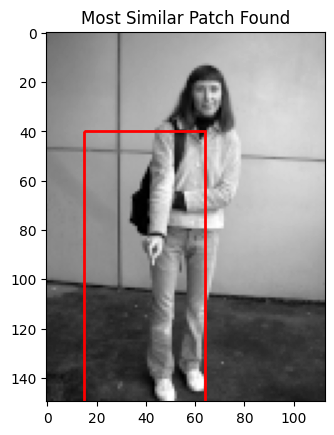

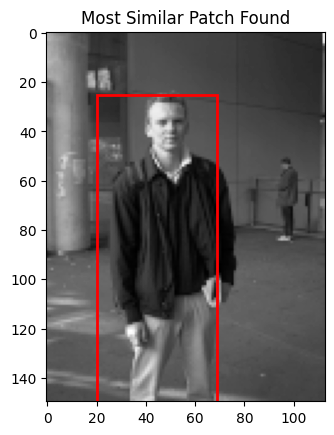

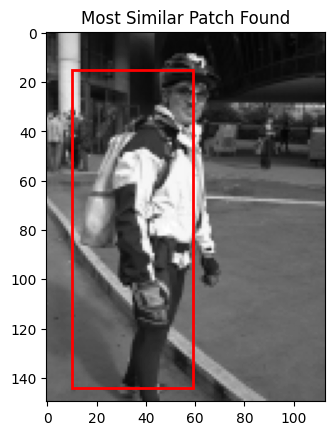

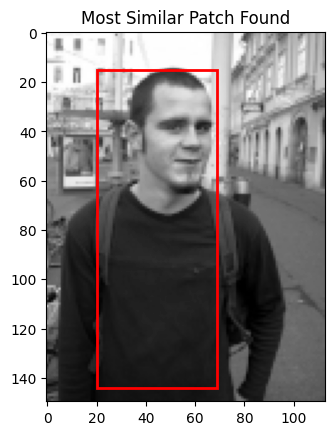

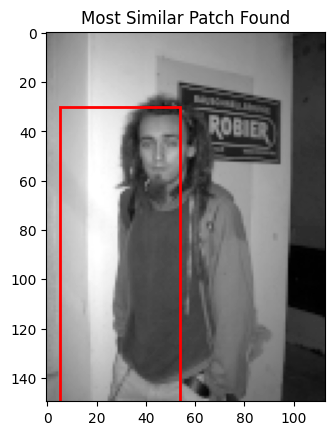

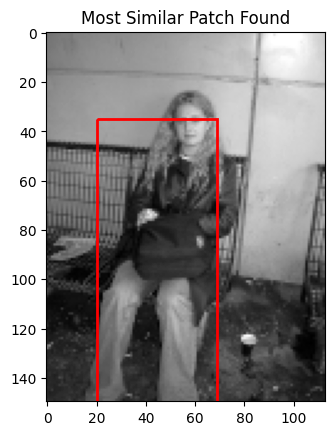

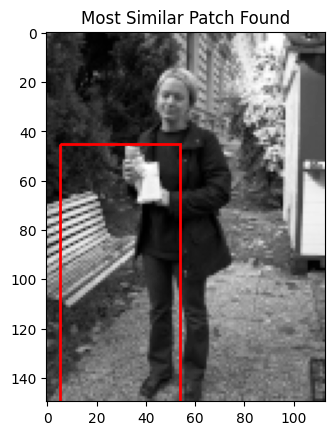

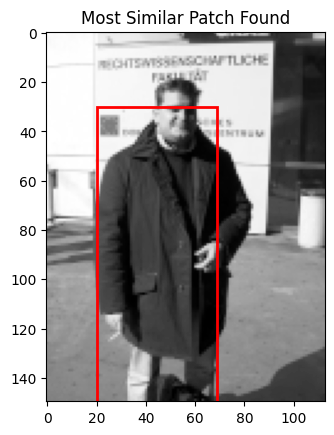

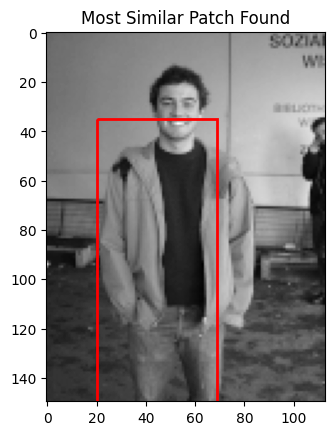

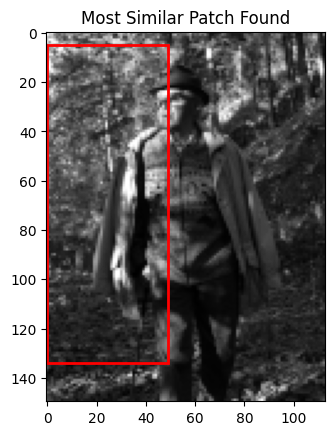

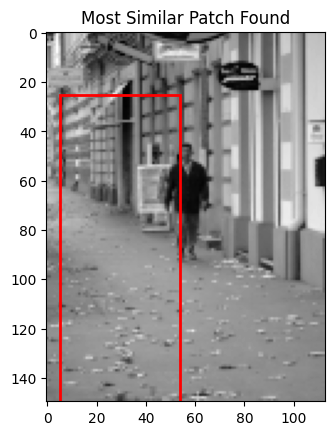

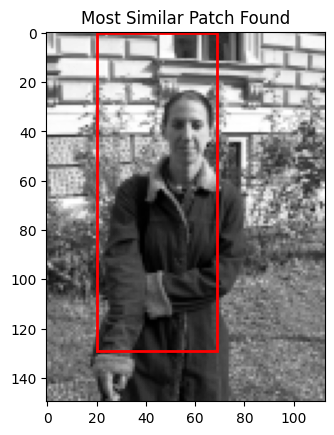

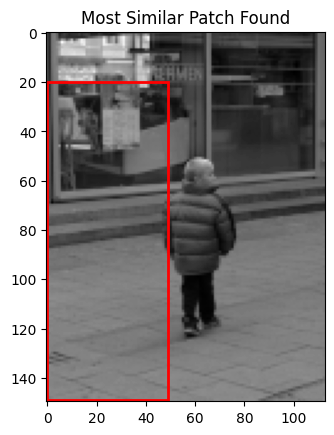

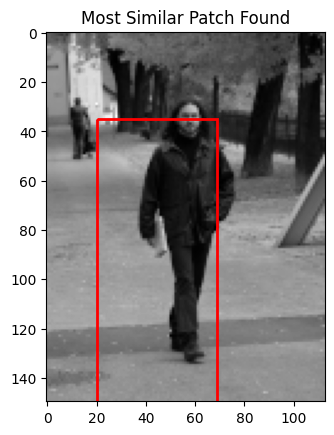

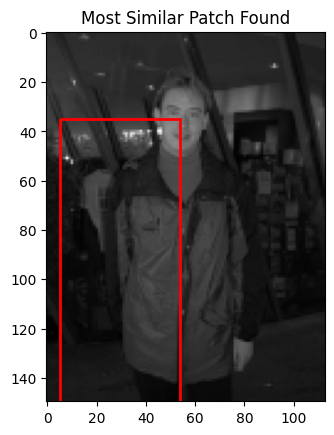

In [ ]:
# solutioin
image = io.imread('person_template.bmp')
image = rgb2gray(rgba2rgb(image))
template_height  = image.shape[0]
template_width = image.shape[1]
step_size = 5

for image_path in os.listdir('pedestrians'):
  if (image_path[-3:]== "bmp"):
    pedestrian = io.imread('pedestrians/'+image_path)
    pedestrian = rgb2gray((pedestrian))
    min_distance = np.inf
    index_h= 0
    index_w = 0
    for i in range(0,image.shape[0],step_size):
      for j in range(0,image.shape[1],step_size):
        if i+template_height < pedestrian.shape[0]:
          if j+template_width < pedestrian.shape[1]:
            patch = pedestrian[i:i+template_height,j:j+template_width]
            descriptor,hog_patch = hog(patch,orientations = 7,pixels_per_cell = (7,7),visualize = True)
            similarity = np.dot(descriptor,_)/(np.linalg.norm(descriptor)*np.linalg.norm(_))
            distance = 1- similarity
            if distance<min_distance:
              index_h = i
              index_w = j
              min_distance = distance
    fig, ax = plt.subplots()
    ax.imshow(pedestrian, cmap='gray')

    rect = patches.Rectangle((index_h, index_w), template_width, template_height,
                         linewidth=2, edgecolor='r', facecolor='none')


    ax.add_patch(rect)


    plt.title("Most Similar Patch Found")
    plt.show()






*   Count the failures and discuss the possible reason for failure for each image.

**Solution**

We have found 7 failures (1st, 5th, 7th, 10th, 11th, 13th,15th) of  the algorithm.  This can be because HOG is not rotation invariant, and people phasing different directions changed orientation and pose. Another issue can be that HOG is not scale invariant, and the little boy can be missclassified becasue of the scale difference.

...

*   Compare template matching and HOG.
*   What are the advantages of HOG over template matching algorithm.

**Solution**
Template matching includes calculating similarity between patches and template and finding the most similar patch using normalized cross correlation. In contrast, HOG uses a sliding window, and for each cell a histogram is calculated which is afterwards also normalized using blocks.
Template matching works well when images have strong features, however it is not scale or orientation invariant. In case of HOG,it is invariant to geometric and photometric transformations and is usually better for object detection.
One of the advantages of HOG is that it requires less time for running for object detection. It also uses image descriptors, hence, it is able to capture local information better.
...


---

# **End of P4: Template Matching and HOG**

This notebook is part of **Deliverable 2**

Deadline for Deliverable 2 (P4 and P5) submission in CampusVirtual is: **Monday, the 28th of October, 2024**
